In [1]:
import os
import torch
import random
import torch.nn as nn 
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms
from model import ViT
from config import (BATCH_SIZE, ADAM_WEIGHT_DECAY, ADAM_BETAS, LEARNING_RATE,
                    EMBED_DIM, PATCH_SIZE, NUM_PATCHES, DROPOUT, IN_CHANNELS,
                    device, NUM_CLASSES, IMG_SIZE, NUM_ENCODERS, NUM_HEADS,
                    HIDDEN_DIM, ACTIVATION, EPOCHS)

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  
])
ds_dir = os.path.join(os.getcwd(), 'dataset')
ds = CIFAR10(root=ds_dir, train=True, download=False, transform=transform)

In [3]:
val_idxs = random.sample(range(50000), 5000)
train_idxs = [idx for idx in range(50000) if idx not in val_idxs]

<Figure size 640x480 with 0 Axes>

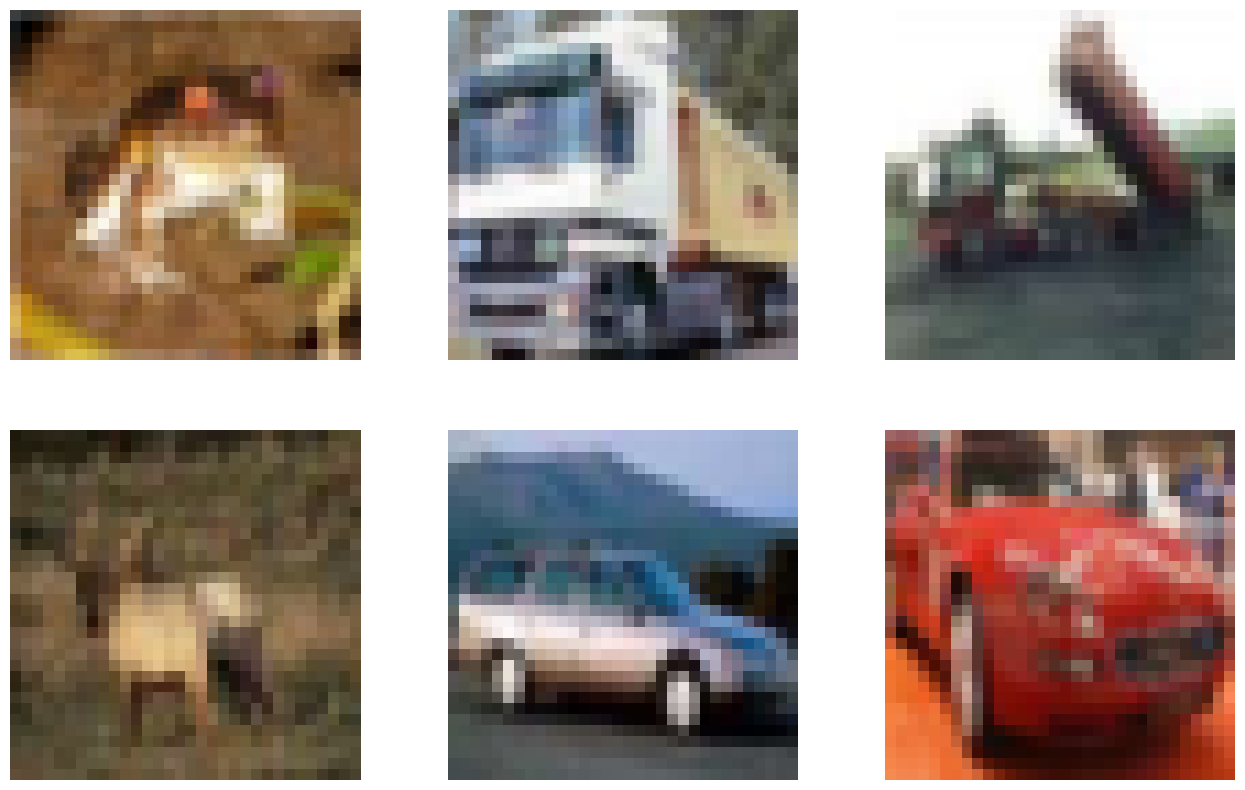

In [4]:
plt.figure()
rows, cols = 2, 3
f, axes = plt.subplots(rows, cols, figsize=(16, 10))

for i in range(rows):
    for j in range(cols):
        img = ds[train_idxs[i * cols + j]][0]
        axes[i, j].imshow(img.permute(1, 2, 0))
        axes[i, j].axis('off')

plt.show()

In [5]:
test_ds = CIFAR10(root=ds_dir, train=False, transform=transform)

In [6]:
                   
train_dl = DataLoader(ds, batch_size=BATCH_SIZE, sampler=train_idxs)
val_dl = DataLoader(ds, batch_size=BATCH_SIZE, sampler=val_idxs)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE)

In [7]:
model = ViT(NUM_PATCHES, IMG_SIZE, NUM_CLASSES, PATCH_SIZE, EMBED_DIM,
                NUM_ENCODERS, NUM_HEADS, HIDDEN_DIM, DROPOUT,
                ACTIVATION, IN_CHANNELS).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), betas=ADAM_BETAS, lr=LEARNING_RATE, weight_decay=ADAM_WEIGHT_DECAY)

epochs_loop = tqdm(range(EPOCHS), desc='Epoch 1/{EPOCHS}')
for epoch in epochs_loop:
    train_loop = tqdm(train_dl, position=0, leave=True)
    
    model.train()
    train_loss = 0

    for idx, item in enumerate(train_loop):
        img = item[0].float().to(device)
        label = item[1].type(torch.uint8).to(device)
        print(img.shape)
        pred = model(img)

        loss = loss_fn(pred, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

        train_loop = tqdm(train_dl, position=0, leave=True)
    
    print(f"Train loss: {train_loss / idx + 1}")

    val_loop = tqdm(val_dl, position=0, leave=True)
    model.eval()
    val_loss = 0

    for idx, item in enumerate(val_loop):
        img = item[0].float().to(device)
        label = item[1].type(torch.uint8).to(device)
        with torch.no_grad():
            pred = model(img)
            pred_label = torch.argmax(pred, axes=1)

            loss = loss_fn(pred_label, label)
            val_loss += loss.item()
    
    print(f"Train loss: {val_loss / idx + 1}")
    epochs_loop.write(f"Epoch {epoch + 1}/{EPOCHS}")

/home/skyisthelimit/code/projects/ml_implementations/virt/lib/python3.11/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
  0%|          | 0/90 [00:00<?, ?it/s]0 [00:00<?, ?it/s]

torch.Size([500, 3, 32, 32])


  1%|          | 1/90 [00:11<16:50, 11.36s/it]

torch.Size([500, 3, 32, 32])


  2%|▏         | 2/90 [00:19<13:58,  9.53s/it]

torch.Size([500, 3, 32, 32])


  3%|▎         | 3/90 [00:27<12:37,  8.71s/it]

torch.Size([500, 3, 32, 32])


  4%|▍         | 4/90 [00:35<12:15,  8.56s/it]

torch.Size([500, 3, 32, 32])


  6%|▌         | 5/90 [00:44<12:10,  8.60s/it]

torch.Size([500, 3, 32, 32])


  7%|▋         | 6/90 [00:52<11:49,  8.45s/it]

torch.Size([500, 3, 32, 32])


  8%|▊         | 7/90 [01:00<11:38,  8.41s/it]

torch.Size([500, 3, 32, 32])


  9%|▉         | 8/90 [01:10<12:13,  8.94s/it]

torch.Size([500, 3, 32, 32])


Epoch 1/{EPOCHS}:   0%|          | 0/40 [01:15<?, ?it/s]


KeyboardInterrupt: 